In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

data = pd.read_csv("character-deaths.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
Name                  917 non-null object
Allegiances           917 non-null object
Death Year            305 non-null float64
Book of Death         307 non-null float64
Death Chapter         299 non-null float64
Book Intro Chapter    905 non-null float64
Gender                917 non-null int64
Nobility              917 non-null int64
GoT                   917 non-null int64
CoK                   917 non-null int64
SoS                   917 non-null int64
FfC                   917 non-null int64
DwD                   917 non-null int64
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [12]:
#把空值以0替代
data.isna().sum()

Name                    0
Allegiances             0
Death Year            612
Book of Death         610
Death Chapter         618
Book Intro Chapter     12
Gender                  0
Nobility                0
GoT                     0
CoK                     0
SoS                     0
FfC                     0
DwD                     0
dtype: int64

In [13]:
select_data = pd.DataFrame(data)
select_data['Death Year'] = select_data['Death Year'].fillna(0)
select_data['Book of Death'] = select_data['Book of Death'].fillna(0)
select_data['Death Chapter'] = select_data['Death Chapter'].fillna(0)
select_data['Book Intro Chapter'] = select_data['Book Intro Chapter'].fillna(0)
select_data

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,0.0,0.0,0.0,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0.0,0.0,0.0,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,0.0,0.0,0.0,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [14]:
# Death Year , Book of Death , Death Chapter三者取一個，將有數值的轉成1 
select_data['Death Year'] = np.where(select_data['Death Year'] > 0, 1.0, 0.0)
select_data

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,0.0,0.0,0.0,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,1.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0.0,0.0,0.0,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,1.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,0.0,0.0,0.0,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,1.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,1.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,1.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [15]:
#將Allegiances轉成dummy特徵(底下有幾種分類就會變成幾個特徵，值是0或1，本來的資料集就會再增加約20種特徵)
select_data_2 = pd.get_dummies(select_data['Allegiances'])
select_data_2

,Arryn,Baratheon,Greyjoy,House Arryn,House Baratheon,House Greyjoy,House Lannister,House Martell,House Stark,House Targaryen,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
select_data_3 = select_data.join(select_data_2)
select_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 34 columns):
Name                  917 non-null object
Allegiances           917 non-null object
Death Year            917 non-null float64
Book of Death         917 non-null float64
Death Chapter         917 non-null float64
Book Intro Chapter    917 non-null float64
Gender                917 non-null int64
Nobility              917 non-null int64
GoT                   917 non-null int64
CoK                   917 non-null int64
SoS                   917 non-null int64
FfC                   917 non-null int64
DwD                   917 non-null int64
Arryn                 917 non-null uint8
Baratheon             917 non-null uint8
Greyjoy               917 non-null uint8
House Arryn           917 non-null uint8
House Baratheon       917 non-null uint8
House Greyjoy         917 non-null uint8
House Lannister       917 non-null uint8
House Martell         917 non-null uint8
House Stark           91

In [17]:
#亂數拆成訓練集(75%)與測試集(25%) 
from sklearn.model_selection import train_test_split
X = select_data_3.iloc[:,5:34]
y = select_data_3.loc[:,"Death Year"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)
X_test

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Arryn,Baratheon,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
613,41.0,1,1,0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
545,42.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
870,0.0,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
724,22.0,1,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
111,23.0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,64.0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
682,45.0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
37,30.0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
766,55.0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
#使用scikit-learn的DecisionTreeClassifier進行預測
#criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different 
#            attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
#max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. 
#            The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
game_clf = clf.fit(X_train, y_train)
predicted = game_clf.predict(X_test)
accuracy = metrics.accuracy_score(predicted, y_test)
print(accuracy)

0.7043478260869566


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[110  41]
 [ 27  52]]
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76       151
         1.0       0.56      0.66      0.60        79

    accuracy                           0.70       230
   macro avg       0.68      0.69      0.68       230
weighted avg       0.72      0.70      0.71       230



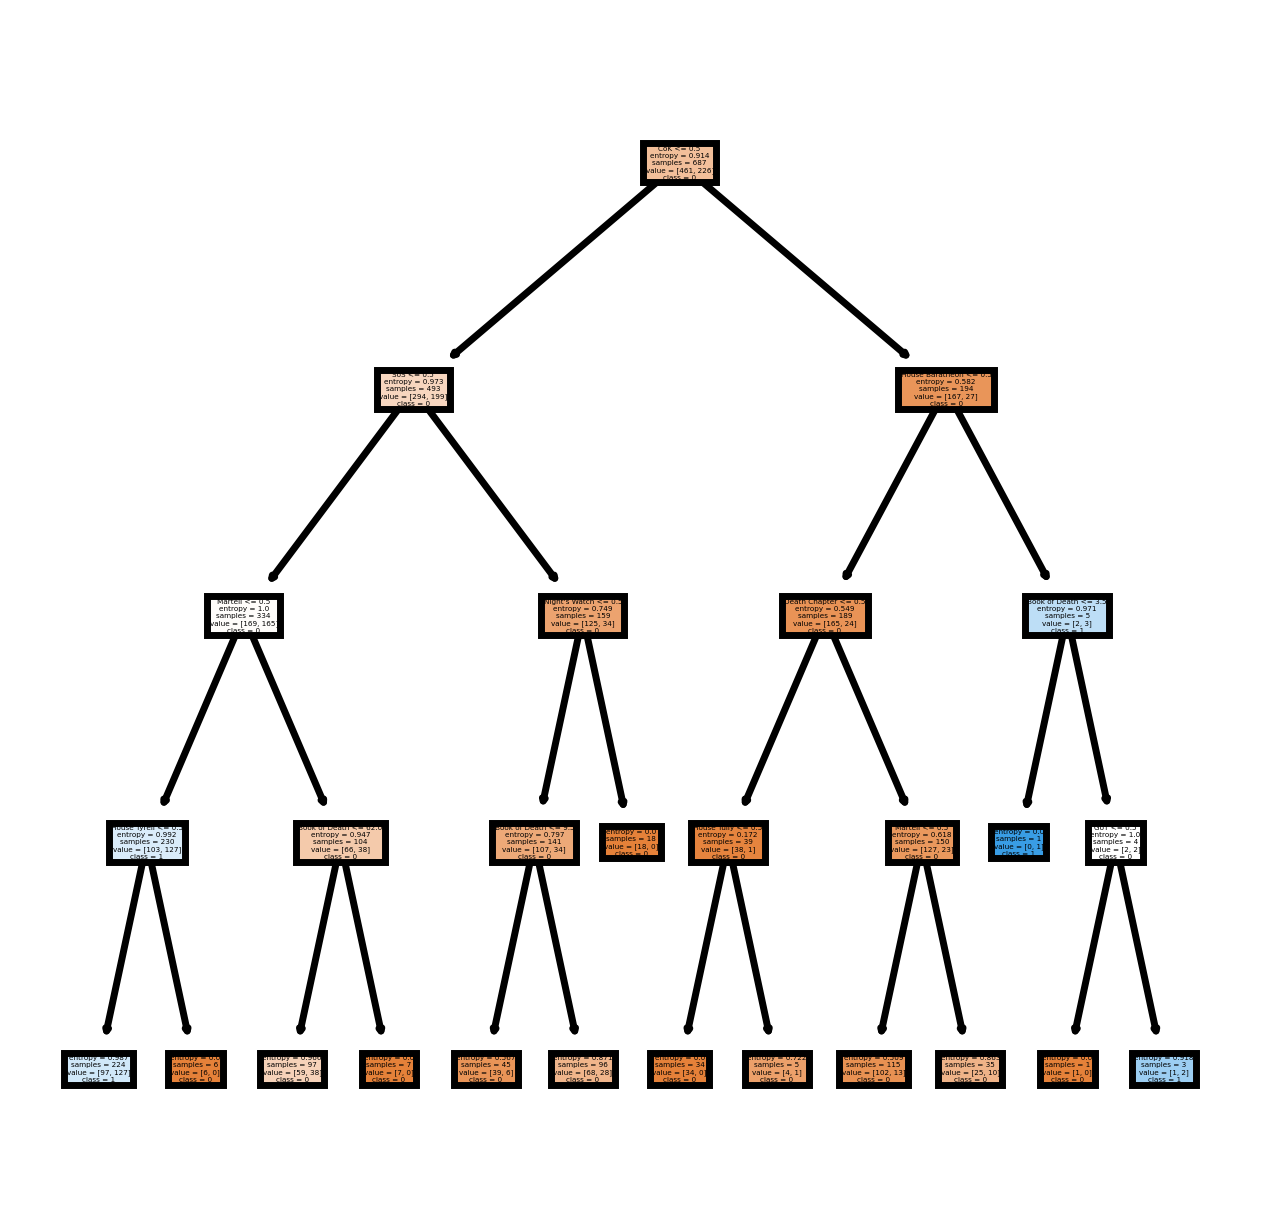

In [20]:
#產出決策樹的圖(限制樹的深度=3) 
fn = ["Book of Death","Death Chapter","Book Intro Chapter","Gender","Nobility","GoT","CoK","SoS","FfC","DwD","Arryn","Baratheon","Greyjoy","House Arryn","House Baratheon","House Greyjoy","House Lannister","House Martell","House Stark","House Targaryen","House Tully","House Tyrell","Lannister","Martell","Night's Watch","Stark","Targaryen","Tully","Tyrell","Wildling"]
cn = ["0","1"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

tree.plot_tree(game_clf,feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')